## The ARIA Method

- Creates a difference image from two coherence images.
- The coherence pair earlier in time is used as a reference and the one later in time as a secondary
- Assume both/all coherence images are in the same projection and 
- Essentially one parameter to 'tune': a threshold $t$

### Histogram Matching

Let $R$ be the reference coherence image and $S$ be the secondary coherence image.

The first step is **histogram matching**. Basically, this attempts to give $S$ the same probability distribution as $R$. The theory is as follows:

Let $F_{R}$ be the CDF of $R$ (flattened) and $F_{S}$ be the CDF of $S$ (flattened)
Then we have 

$$T = F_{R}^{-1}(F_{S}(S))$$ 

which maps $S$ to a new image $T$ that has (in theory) the same distribution as $R$.
So, after histogram matching, we have $R$ and $T$.

### Difference and causality constraint

Next, is a simple (element-wise) **difference**.

$$D = R - T$$

Now, since normal coherence values should be in the interval $[0,1]$, $D$ has values in the range $[-1,1]$.

Next, we apply a **causality constraint**. Basically, we only observe positive values in $D$. This corresponds to a *loss of coherence* and filters out any pixels that would represent a *gain of coherence*. In the context of Damage Proxy Maps or Slowdown Proxy Maps, it makes sense that we are not looking for a gain in coherence.

Our final image $A$ (for ARIA!) is thus

$$A = \begin{cases}
D & \text{if } D > 0 \\
0 & \text{otherwise}
\end{cases}$$

In [1]:
import os
os.chdir('../source')
from ARIA import ARIA
from Image import Image
import numpy as np
import matplotlib.pyplot as plt

data_dir = '/data/csimmons/LA_coh'

In [2]:
ref = Image(data_dir+'/20200112/merged/interferograms/20200106_20200112/geo_filt_fine.cor.tif')
ref.read()
sec = Image(data_dir+'/20200405/merged/interferograms/20200106_20200405/geo_filt_fine.cor.tif')
sec.read()

geographic_bounds = [-118.7, -117.7, 33.5, 34.2]
aria = ARIA(geographic_bounds)

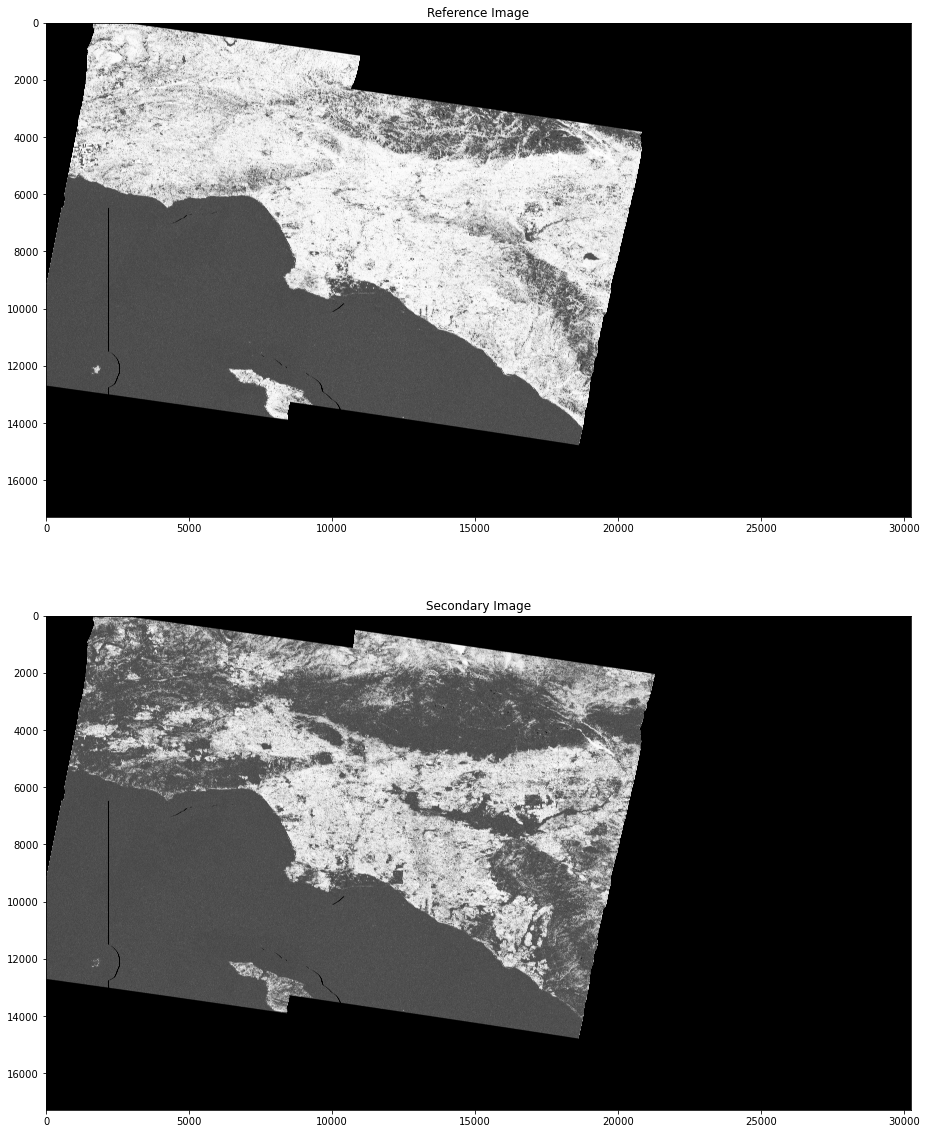

In [3]:
fig, ax = plt.subplots(figsize=(20,20), nrows=2)
ax[0].imshow(ref.band, cmap='gray')
ax[0].set_title('Reference Image')
ax[1].imshow(sec.band, cmap='gray')
ax[1].set_title('Secondary Image')
plt.show()

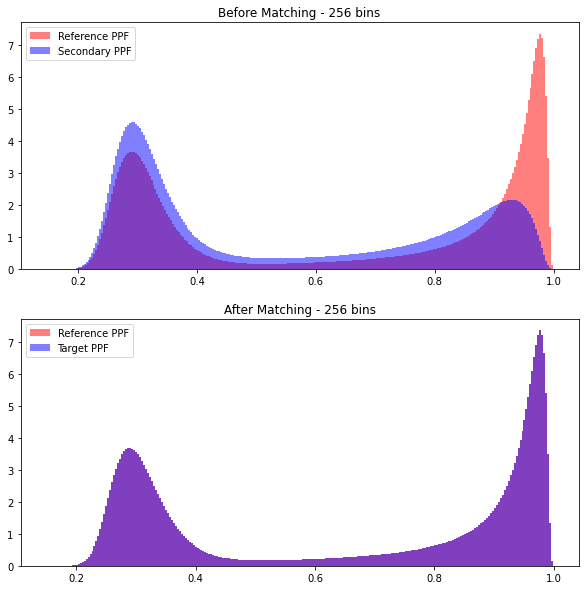

In [3]:
save_data = aria.process_ARIA(ref, [sec], t=0.2, map_type=aria.simple_map, file_prefix='Example', show_hists=True)

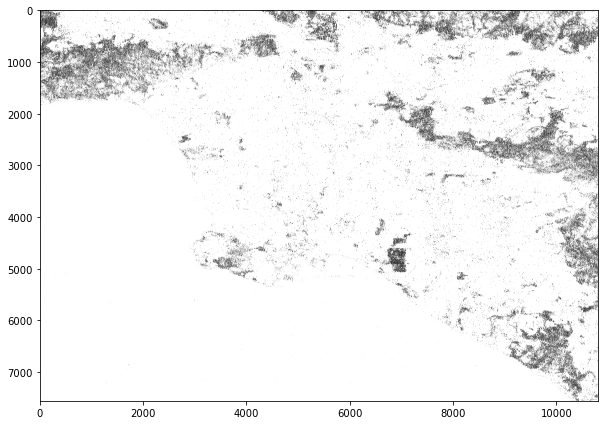

In [4]:
for save in save_data:
    band = save.map
    plt.figure(figsize=(10,10))
    plt.imshow(band, cmap='binary')
    plt.show()